<a href="https://colab.research.google.com/github/Shape95/DACON-abalone-age-prediction/blob/main/%EC%A0%84%EB%B3%B5_%EB%82%98%EC%9D%B4_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전복 나이 예측 경진대회 

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 1. 데이터 준비 및 모듈 임포트


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 데이터 정리 및 처리
import pandas as pd
import numpy as np

# 시각화
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection


# 경고 제거 (판다스가 에러 메시지를 자주 만들어 내기 때문)
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir = '/content/drive/MyDrive/개인/AI/DACON/전복 나이 예측 경진대회/data/'

# csv형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv(dir + 'train.csv')
test = pd.read_csv(dir + 'test.csv')

In [5]:
dir = '/content/drive/MyDrive/개인/AI/DACON/전복 나이 예측 경진대회/data/'

# csv형식으로 된 데이터 파일을 읽어옵니다.
train1 = pd.read_csv(dir + 'train.csv')
test1 = pd.read_csv(dir + 'test.csv')

# 2. 파일 병합

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Target'].values

# train, test 병합
data = pd.concat((train, test))

print('data size is : {}'.format(data.shape))

data size is : (4177, 10)


# 3. 파일 탐색

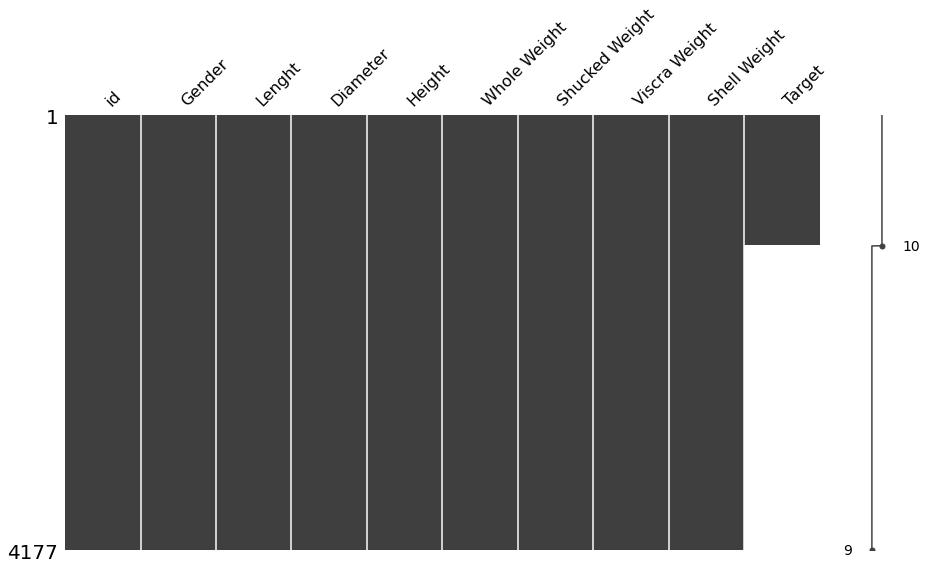

In [7]:
missingno.matrix(data, figsize = (15,8))

In [8]:
data.isnull().sum()

id                   0
Gender               0
Lenght               0
Diameter             0
Height               0
Whole Weight         0
Shucked Weight       0
Viscra Weight        0
Shell Weight         0
Target            2924
dtype: int64

In [9]:
data.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15.0
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8.0
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18.0
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13.0
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6.0


In [10]:
data.Gender.value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

# 4. 데이터 탐구 (EDA)

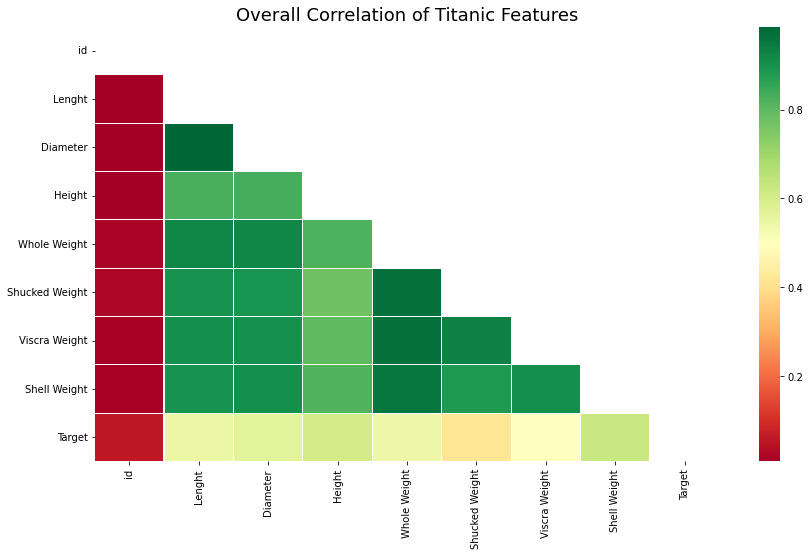

In [11]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

correlation으로 본 결과 대부분의 특징들이 함께 증가하는 양의 상관성을 가지고 있습니다.





Age

In [12]:
# 성별 개체 수
train[['Gender', 'Target']].groupby(['Gender']).mean()

,Target
Gender,
F,11.086842
I,7.876238
M,10.714286


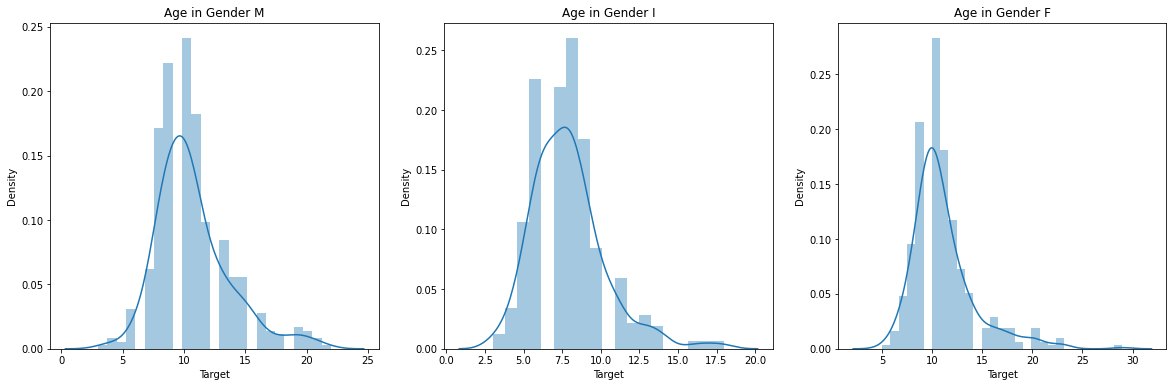

In [13]:
# 성별 개체 수
f, ax = plt.subplots(1, 3, figsize = (20, 6))
sns.distplot(train[train['Gender'] == 'M'].Target, ax=ax[0])
ax[0].set_title('Age in Gender M')
sns.distplot(train[train['Gender'] == 'I'].Target, ax=ax[1])
ax[1].set_title('Age in Gender I')
sns.distplot(train[train['Gender'] == 'F'].Target, ax=ax[2])
ax[2].set_title('Age in Gender F')
plt.show()

Lenght 분석

In [15]:
print('Highest Lenght :', data['Lenght'].min())
print('Lowest Lenght :', data['Lenght'].max())
print('Average Lenght :', data['Lenght'].mean())

Highest Lenght : 0.075
Lowest Lenght : 0.815
Average Lenght : 0.5239920995930091


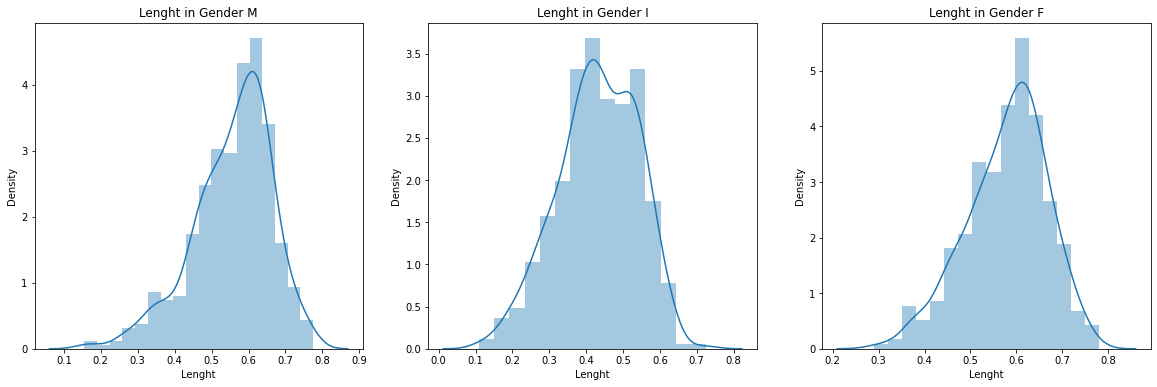

In [16]:
f, ax = plt.subplots(1, 3, figsize = (20, 6))
sns.distplot(train[train['Gender'] == 'M'].Lenght, ax=ax[0])
ax[0].set_title('Lenght in Gender M')
sns.distplot(train[train['Gender'] == 'I'].Lenght, ax=ax[1])
ax[1].set_title('Lenght in Gender I')
sns.distplot(train[train['Gender'] == 'F'].Lenght, ax=ax[2])
ax[2].set_title('Lenght in Gender F')
plt.show()

# 5. Feature Engineering


In [17]:
temp = data.copy()

# 6. 마지막 항목 결정


In [18]:
temp['F1'] = temp['Gender']
temp['F2'] = temp['Lenght']
temp['F3'] = temp['Diameter']
temp['F4'] = temp['Height']
temp['F5'] = temp['Whole Weight']
temp['F6'] = temp['Shucked Weight']
temp['F7'] = temp['Viscra Weight']
temp['F8'] = temp['Shell Weight']

temp.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,F1,F2,F3,F4,F5,F6,F7,F8
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15.0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8.0,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18.0,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13.0,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6.0,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400


인코딩

In [19]:
# LabelEncoding
dfl = pd.DataFrame() 

In [20]:
good_columns = ['F1','F2','F3','F4','F5','F6','F7','F8']
dfl[good_columns] = temp[good_columns]

# OneHotEncoding
dfh = dfl.copy()

In [21]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8
0,2,96,77,22,1641,742,578,554
1,1,61,46,18,502,322,157,178
2,1,91,81,38,1904,1004,504,718
3,2,82,64,34,1850,1037,646,604
4,1,37,30,17,143,80,59,61


In [22]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_F,F1_I,F1_M,F2_0.075,F2_0.11,F2_0.13,F2_0.135,F2_0.14,F2_0.15,F2_0.155,...,F8_0.725,F8_0.726,F8_0.76,F8_0.78,F8_0.7975,F8_0.815,F8_0.85,F8_0.885,F8_0.897,F8_1.005
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 7. 모델 만들기


In [23]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [24]:
X_test = test
X_train = train

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression() 
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

In [27]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression() 
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

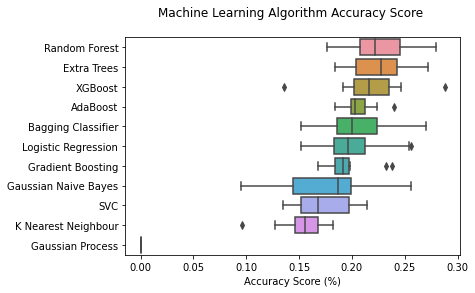

In [28]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# 8. 하이퍼 파라미터 튜닝

### SVC

In [29]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.17718247011952187
{'C': 1, 'gamma': 0.001}


### Gradient Boosting Classifier
* learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
* n_estimator는 각 경우의 트리 숫자입니다.

In [ ]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


### Logistic Regression

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### XGBoost Step 1.

In [ ]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### XGB Step 2.

In [ ]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### XGB Step 3.

In [ ]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### XGB Step 4

In [ ]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### XGB Step 5

In [ ]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### Random Forest.

In [ ]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### Extra Trees

In [ ]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### KNN

In [ ]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

### Bagging Classifier

In [ ]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

# 9. 모델 재 트레이닝


In [ ]:
ran = RandomForestClassifier(random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

log = LogisticRegression(C=2.7825594022071245, penalty='l2')

xgb = XGBClassifier(learning_rate=0.1, n_estimators=10, max_depth=7, 
                                          min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=5)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=75, random_state=1)

In [ ]:
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=2, weights='uniform')
scores3={}
knn.fit(X_train, y_train)
acc = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv=10)
scores3['K Nearest Neighbour'] = acc

In [ ]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

## 10. Dacon 대회에 제출하기 (Submission)

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [ ]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

In [ ]:
grid_soft = VotingClassifier(estimators = [('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

In [ ]:
# Final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(test1['id']), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["id", "Target"]
submission.to_csv(dir+'sample_submission1.csv', header = True, index = False)

In [ ]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(test1['id']), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["id", "Target"]
submission.to_csv(dir+'sample_submission2.csv', header = True, index = False)